<a href="https://colab.research.google.com/github/bohdanhlovatskyi/OhISee/blob/master/Camera_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import random as rng
from glob import glob

In [29]:

CHECKBOARD_SIZE = (10,7)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
winSize = (5,5) # area of check (5*2 + 1) - 11x11
zeroZone = (-1,-1) # no zeroZone

objp = np.zeros((1, CHECKBOARD_SIZE[0] * CHECKBOARD_SIZE[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKBOARD_SIZE[0], 0:CHECKBOARD_SIZE[1]].T.reshape(-1, 2)
img_points = [] # 2d points
objpoints = [] # 3d points

['./2022-04-12 15.40.01.jpg', './2022-04-12 15.39.39.jpg', './2022-04-12 15.39.43.jpg']


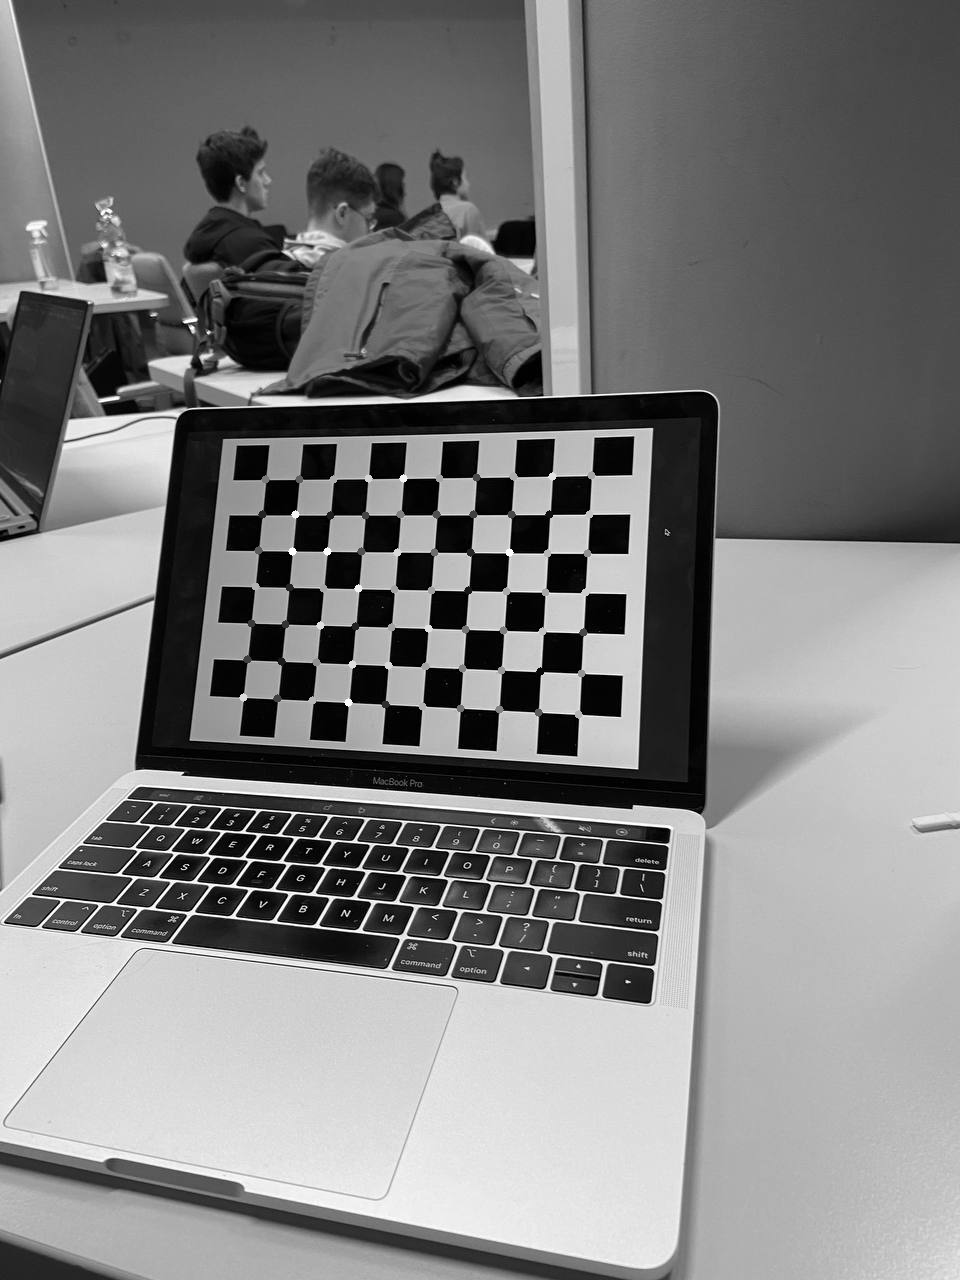

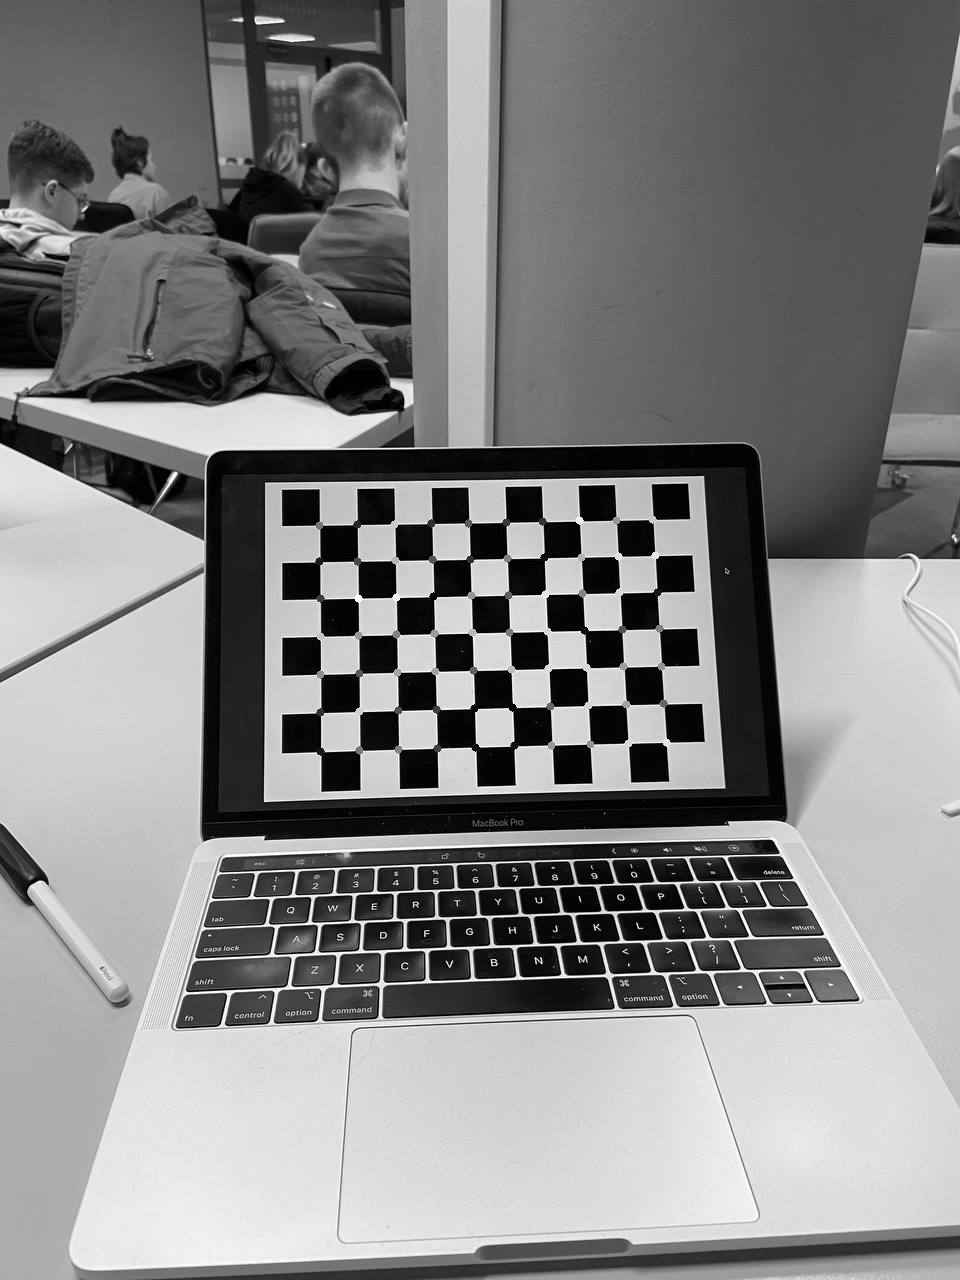

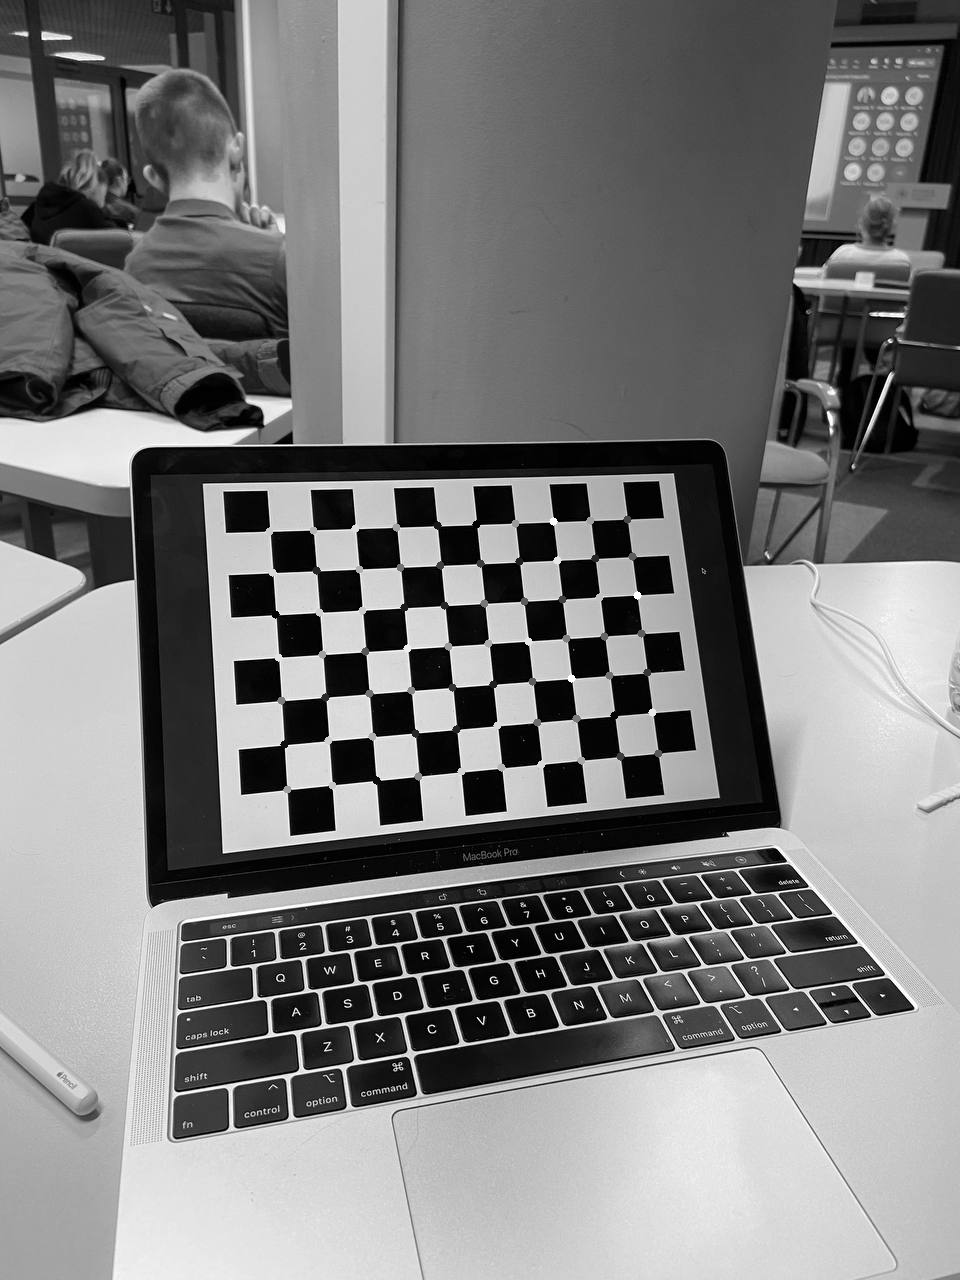

Camera matrix: 
[[932.69580652   0.         474.75173933]
 [  0.         934.22280576 632.68351594]
 [  0.           0.           1.        ]]


In [31]:
images = glob("./*.jpg")
print(images)
for i in images:
  img_gray = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
  retval, corners = cv2.findChessboardCorners(img_gray, CHECKBOARD_SIZE)
  if not retval:
    raise Exception("Cannot find corners")

  # draw circles
  radius = 4
  copy = np.copy(img_gray)
  for i in range(corners.shape[0]):
    cv2.circle(copy, (int(corners[i,0,0]), 
                    int(corners[i,0,1])), 
              radius, (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256)), cv2.FILLED)
  cv2_imshow(copy)

  precise_corners = cv2.cornerSubPix(img_gray, corners, winSize, zeroZone, criteria)
  objpoints.append(objp)
  img_points.append(precise_corners)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, img_points, img_gray.shape[::-1], None, None)
print(f"Camera matrix: \n{mtx}")